In [17]:
import pandas as pd

In [18]:
import numpy as nm

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns


In [21]:
import re

In [22]:
data = pd.read_csv("train.csv")

In [23]:
data.head(10)

,id,text,label
0,26418.0,Gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,14473.0,@USER Çoook çok bi baklava bi sen zaten,0
2,16107.0,"1) Sn. DÜKEL; Atatürk'ün, Karma E. M. ile başl...",0
3,45908.0,Konfederasyonumuzun Aile ve Sosyal Politikalar...,0
4,12878.0,Hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1
5,22887.0,@USER @USER @USER @USER @USER @USER @USER @USE...,0
6,42028.0,#KYKYurtZammınaHayır Öğrenci sizin gelir kayna...,0
7,34514.0,@USER @USER Sabırlı ol. Soruşturma devam ediyo...,0
8,21684.0,Toprağın üstünde Aziz ettin .! Toprağın altı...,0
9,37783.0,"Rüyalarımda mevzu her ne olursa olsun, asla so...",0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42398 entries, 0 to 42397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      27993 non-null  float64
 1   text    42398 non-null  object 
 2   label   42398 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 993.8+ KB


In [25]:
data.nunique()

id       27993
text     42398
label        2
dtype: int64

In [26]:
data.isnull().sum()

id       14405
text         0
label        0
dtype: int64

In [27]:
(data.isnull().sum()/(len(data)))*100


id       33.975659
text      0.000000
label     0.000000
dtype: float64

In [28]:
data = data.drop(['id'], axis = 1)

In [29]:
data.head()

,text,label
0,Gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,@USER Çoook çok bi baklava bi sen zaten,0
2,"1) Sn. DÜKEL; Atatürk'ün, Karma E. M. ile başl...",0
3,Konfederasyonumuzun Aile ve Sosyal Politikalar...,0
4,Hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1


In [30]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,42398,42398,Bi airdrop sapığı eksikti aq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,42398.0,NaN,NaN,NaN,0.467215,0.49893,0.0,0.0,0.0,1.0,1.0


In [31]:
data.tail()

,text,label
42393,Takım otobüsüne saldırmak nedir ulan şerefini ...,1
42394,@nightmareess_ Aynı bu şekldiyedim ya başlica...,1
42395,@prodbyjaysou @kkesbekes ya kaybol twitimden k...,1
42396,@82_6363AB Ben hdpliyim ve vermeyecem ama akp ...,1
42397,Bi airdrop sapığı eksikti aq,1


In [32]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=nm.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['text'], dtype='object')
Numerical Variables:
['label']


<Axes: xlabel='label', ylabel='count'>

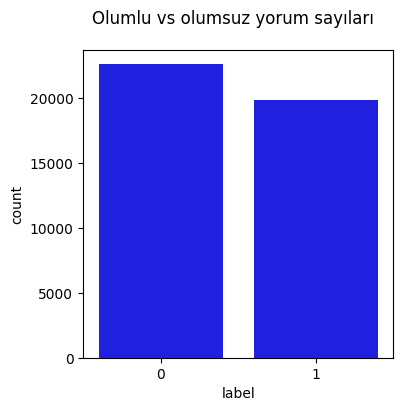

In [33]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('Olumlu vs olumsuz yorum sayıları')
sns.countplot(ax=ax, x='label', data=data, color='blue', order=data['label'].value_counts().index)


In [34]:
from collections import Counter
import re

# Örnek olarak 'message' sütunundaki metinleri alıyoruz (sen kendi sütununu kullanabilirsin)
text_data = " ".join(data['text'].astype(str))  # Tüm mesajları tek bir metin haline getiriyoruz

# Metni temizleme: Noktalama işaretlerini kaldır, küçük harfe çevir
cleaned_text = re.sub(r'[^\w\s]', '', text_data.lower())

# Kelimeleri ayırma
words = cleaned_text.split()

# Kelimeleri sayma
word_counts = Counter(words)

# En çok geçen 10 kelimeyi bulma
most_common_words = word_counts.most_common(10)

# Sonuçları yazdırma
for word, count in most_common_words:
    print(f"{word}: {count}")


user: 21126
bir: 8781
bu: 8633
ve: 5471
ne: 4926
amk: 4876
de: 4373
da: 3934
çok: 3534
o: 3364


In [35]:
import nltk
from collections import Counter
import re

# NLTK stopwords'i indirme
nltk.download('stopwords')
from nltk.corpus import stopwords

# Örnek olarak 'message' sütunundaki metinleri alıyoruz (sen kendi sütununu kullanabilirsin)
text_data = " ".join(data['text'].astype(str))  # Tüm mesajları tek bir metin haline getiriyoruz

# Metni temizleme: Noktalama işaretlerini kaldır, küçük harfe çevir
cleaned_text = re.sub(r'[^\w\s]', '', text_data.lower())

# Kelimeleri ayırma
words = cleaned_text.split()

# İngilizce stopwords listesini alıyoruz
stop_words = set(stopwords.words('turkish'))

# Stopwords olmayan kelimeleri filtreleme
filtered_words = [word for word in words if word not in stop_words]

# Kelimeleri sayma
word_counts = Counter(filtered_words)

# En çok geçen 10 kelimeyi bulma
most_common_words = word_counts.most_common(30)

# Sonuçları yazdırma
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to C:\Users\Halid Buğra
[nltk_data]     Gökdeniz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


user: 21126
bir: 8781
amk: 4876
aq: 3256
ben: 3104
var: 2856
bi: 2748
kadar: 2728
yok: 2475
mi: 2077
sen: 2007
değil: 1969
bile: 1535
iyi: 1533
sonra: 1505
senin: 1404
olsun: 1351
koduğumun: 1323
güzel: 1294
böyle: 1276
seni: 1242
artık: 1134
amına: 1132
olan: 1032
zaman: 1007
benim: 1002
bana: 985
zaten: 918
olarak: 905
şimdi: 877


In [36]:
# 'message' sütunundaki her bir metnin kelime sayısını hesapla
message_lengths = data['text'].astype(str).apply(lambda x: len(x.split()))

# Ortalama kelime uzunluğunu hesapla
average_length = message_lengths.mean()

print(f"Metinlerde Ortalama cümle uzunluğu: {average_length:.2f}")


Metinlerde Ortalama cümle uzunluğu: 16.35


[nltk_data] Downloading package stopwords to C:\Users\Halid Buğra
[nltk_data]     Gökdeniz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Halid Buğra Gökdeniz\AppData\Local\Temp\ipykernel_13400\2240246305.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


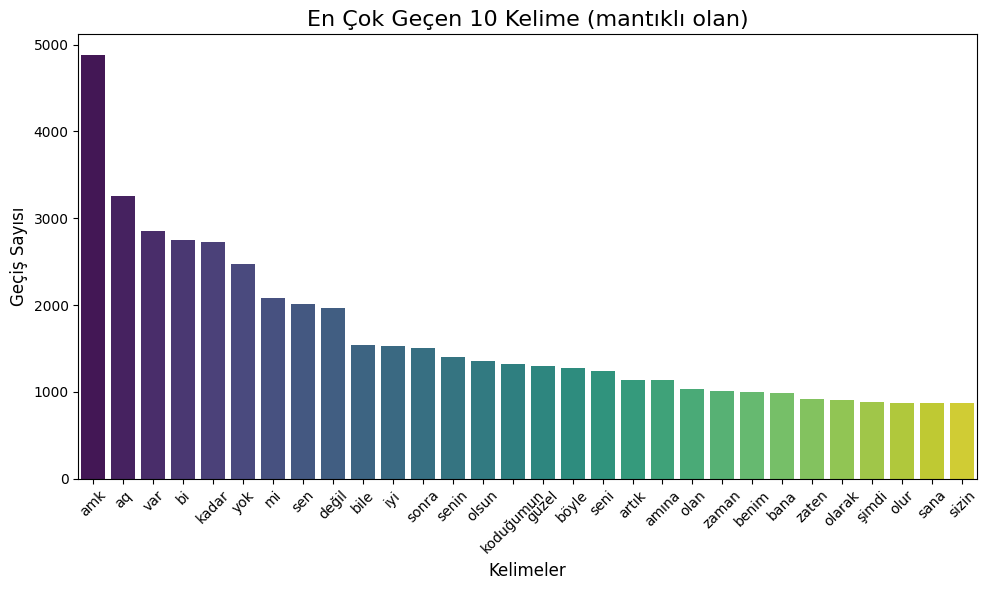

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Örnek olarak 'message' sütunundaki metinleri alıyoruz (kendi verini kullanabilirsin)
text_data = " ".join(data['text'].astype(str))  # Tüm mesajları tek bir metin haline getiriyoruz

# Metni temizleme: Noktalama işaretlerini kaldır, küçük harfe çevir
cleaned_text = re.sub(r'[^\w\s]', '', text_data.lower())

# Kelimeleri ayırma
words = cleaned_text.split()

# İngilizce stopwords listesini alıyoruz
stop_words = set(stopwords.words('turkish'))

## Çıkarmak istediğin kelimeleri bir diziye ekleyelim
specific_words = ['user', 'bir', 'ben']  # Çıkarmak istediğin kelimeleri buraya ekle

# Stopwords olmayan kelimeleri filtreleme ve spesifik kelimeleri de çıkartıyoruz
filtered_words = [word for word in words if word not in stop_words and word not in specific_words]

# Kelimeleri sayma
word_counts = Counter(filtered_words)

# En çok geçen 10 kelimeyi bulma
most_common_words = word_counts.most_common(30)

# Kelimeleri ve sayılarını ayrı listelere ayır
words, counts = zip(*most_common_words)

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')

# Grafiğe başlık ve etiketler ekleyelim
plt.title('En Çok Geçen 10 Kelime (mantıklı olan)', fontsize=16)
plt.xlabel('Kelimeler', fontsize=12)
plt.ylabel('Geçiş Sayısı', fontsize=12)

# X eksenindeki kelimeleri 90 derece döndür (eğer kelimeler üst üste binerse)
plt.xticks(rotation=45)

# Grafiği gösterme
plt.tight_layout()
plt.show()


In [38]:
 pip install TurkishStemmer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from TurkishStemmer import TurkishStemmer

In [40]:
turk_stem = TurkishStemmer()
turk_stem

In [41]:
def stemming(content):
    review = re.sub('[^A-ZĞÜŞİÇÖ^a-zığüşöç]',' ',content)
    review = review.lower()
    review = review.split()
    review = [turk_stem.stem(word) for word in review if not word in stopwords.words('turkish')]
    review = ' '.join(review)
    return review

In [42]:
data['text'] = data['text'].apply(stemming)

In [43]:
data.head(5)

,text,label
0,gerçek siz hikaye izleyerek mi yen yıl girice,0
1,user çoook bi baklav bi sen zaten,0
2,sn dükel atatürk ün karm e m başlattık siyasi ...,0
3,konfederasyon ail sosyal politika bakanlık ist...,0
4,hakem tarih yazıyor kişi karş ön olacak alanya...,1


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd

# İlk 30.000 veriyi seçelim ve eksik veya boş verileri temizleyelim
data = data.dropna(subset=['text', 'label']).iloc[:40000]
data = data[data['text'].str.strip() != '']

# Metin verisini ve etiketleri ayıralım
text_data = data['text']
labels = data['label']

# TF-IDF özellik çıkarımı (en çok kullanılan 10000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (3 boyuta indir)
svd = TruncatedSVD(n_components=3, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_categorical, test_size=0.3, random_state=42)

# Yapay sinir ağı modelini tanımlayalım
model = Sequential([
    Dense(256, input_dim=3, activation='relu'),
    Dense(128, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Modelin başarımını değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/50


C:\Users\Halid Buğra Gökdeniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7848 - loss: 0.5004 - val_accuracy: 0.8109 - val_loss: 0.4435
Epoch 2/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8115 - loss: 0.4372 - val_accuracy: 0.8195 - val_loss: 0.4214
Epoch 3/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8202 - loss: 0.4175 - val_accuracy: 0.8133 - val_loss: 0.4224
Epoch 4/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8241 - loss: 0.4089 - val_accuracy: 0.8202 - val_loss: 0.4094
Epoch 5/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8250 - loss: 0.4059 - val_accuracy: 0.8201 - val_loss: 0.4075
Epoch 6/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8204 - loss: 0.4074 - val_accuracy: 0.8127 - val_loss: 0.4189
Epoch 7/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8255 - loss: 0.4038 - val_accuracy: 0.8095 - val_loss: 0.4231
Epoch 8/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8296 - loss: 0.3988 - val_accuracy: 0.8198 - val_

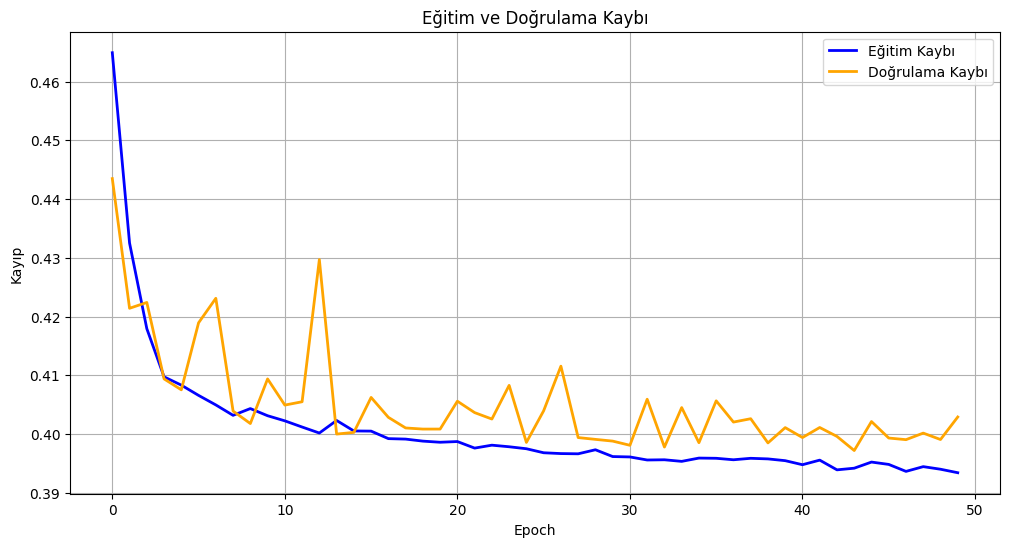

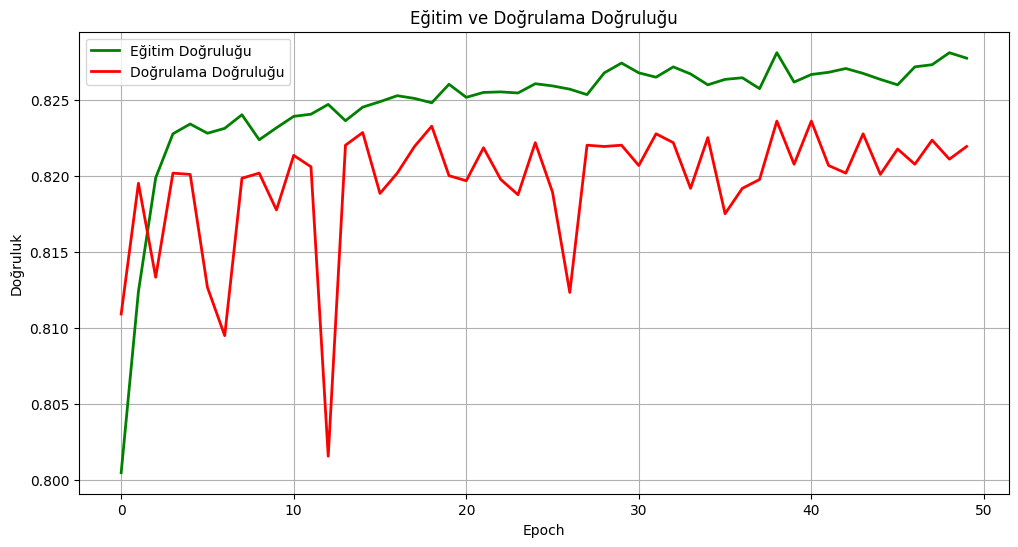

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='orange', linewidth=2)
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)
plt.show()

# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', color='red', linewidth=2)
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
import numpy as np

# Kullanıcıdan manuel giriş alma ve sınıflandırma
def classify_text(manual_text, model, tfidf_vectorizer, svd, label_encoder):
    # Metni TF-IDF ile dönüştür
    text_tfidf = tfidf_vectorizer.transform([manual_text])
    
    # TF-IDF çıktısını SVD ile boyut indir
    text_reduced = svd.transform(text_tfidf)
    
    # Model ile tahmin yap
    prediction = model.predict(text_reduced)
    
    # Tahmini sınıfı etiket olarak çöz
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    
    return predicted_label[0]

# Örnek kullanım
while True:
    user_input = input("Bir metin girin (çıkmak için 'exit' yazın): ")
    if user_input.lower() == 'exit':
        break
    result = classify_text(user_input, model, tfidf_vectorizer, svd, label_encoder)
    print(f"Tahmin edilen sınıf: {result}")


Bir metin girin (çıkmak için 'exit' yazın):  bok


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Tahmin edilen sınıf: 1


Bir metin girin (çıkmak için 'exit' yazın):  balon 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin edilen sınıf: 0


Bir metin girin (çıkmak için 'exit' yazın):  tarak


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin edilen sınıf: 0


Bir metin girin (çıkmak için 'exit' yazın):  kafasız


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin edilen sınıf: 0


Bir metin girin (çıkmak için 'exit' yazın):  deli


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Tahmin edilen sınıf: 0


Bir metin girin (çıkmak için 'exit' yazın):  salak


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Tahmin edilen sınıf: 1


Bir metin girin (çıkmak için 'exit' yazın):  exit


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# İlk 30.000 veriyi seçelim ve eksik veya boş verileri temizleyelim
data = data.dropna(subset=['text', 'label']).iloc[:40000]
data = data[data['text'].str.strip() != '']

# Metin verisini ve etiketleri ayıralım
text_data = data['text']
labels = data['label']

# TF-IDF özellik çıkarımı (en çok kullanılan 10000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (3 boyuta indir)
svd = TruncatedSVD(n_components=3, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

# SVM modelini tanımlayalım
svm_model = SVC(kernel='linear', random_state=42)

# Modeli eğitelim
svm_model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = svm_model.predict(X_test)

# Modelin başarımını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Sınıflandırma raporu yazdıralım
print(classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_]))


Test Accuracy: 0.7731666666666667
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      6719
           1       0.85      0.59      0.70      5281

    accuracy                           0.77     12000
   macro avg       0.80      0.75      0.76     12000
weighted avg       0.79      0.77      0.76     12000



In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# İlk 30.000 veriyi seçelim ve eksik veya boş verileri temizleyelim
data = data.dropna(subset=['text', 'label']).iloc[:40000]
data = data[data['text'].str.strip() != '']

# Metin verisini ve etiketleri ayıralım
text_data = data['text']
labels = data['label']

# TF-IDF özellik çıkarımı (en çok kullanılan 10000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (3 boyuta indir)
svd = TruncatedSVD(n_components=3, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

# Logistic Regression modelini tanımlayalım
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = logistic_model.predict(X_test)

# Modelin başarımını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Sınıf adlarını string olarak geçelim
target_names = [str(cls) for cls in label_encoder.classes_]

# Sınıflandırma raporu yazdıralım
print(classification_report(y_test, y_pred, target_names=target_names))


Test Accuracy: 0.78975
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      6719
           1       0.85      0.63      0.73      5281

    accuracy                           0.79     12000
   macro avg       0.81      0.77      0.78     12000
weighted avg       0.80      0.79      0.78     12000



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = data.dropna(subset=['text', 'label']).iloc[:40000]
data = data[data['text'].str.strip() != '']

text_data = data['text']
labels = data['label']

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

X_reduced = svd.fit_transform(X_tfidf)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

target_names = [str(cls) for cls in label_encoder.classes_]

print(classification_report(y_test, y_pred, target_names=target_names))


Test Accuracy: 0.8434166666666667
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      6719
           1       0.96      0.68      0.79      5281

    accuracy                           0.84     12000
   macro avg       0.87      0.83      0.83     12000
weighted avg       0.86      0.84      0.84     12000



In [49]:
import stanza

In [50]:
data.head()

,text,label
0,gerçek siz hikaye izleyerek mi yen yıl girice,0
1,user çoook bi baklav bi sen zaten,0
2,sn dükel atatürk ün karm e m başlattık siyasi ...,0
3,konfederasyon ail sosyal politika bakanlık ist...,0
4,hakem tarih yazıyor kişi karş ön olacak alanya...,1
